# モンティ・ホール問題
- [Wikipedia](https://ja.wikipedia.org/wiki/モンティ・ホール問題)

In [1]:
sns.set()

In [2]:
TRIAL = 1000

In [3]:
def get_result():
    door = [False]*3
    door[int(np.floor(random.random() * 3))] = True
    return pd.DataFrame({
        'no_change': [1 if door[0] else 0],
        'change'   : [1 if door[1] or door[2] else 0],
    })

result = Parallel(n_jobs=-1, verbose=10)([delayed(get_result)() for _ in range(TRIAL)])
result = pd.concat(result)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1873s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0351s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0461s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0604s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1120s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1990s.) Setting batc

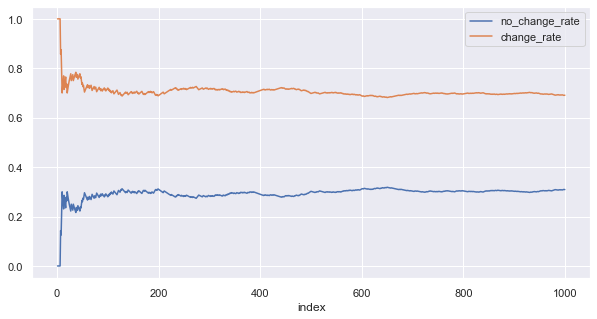

In [4]:
result['index'] = range(1,TRIAL+1)
result['no_change_rate'] = result['no_change'].cumsum()/result['index']
result['change_rate'] = result['change'].cumsum()/result['index']
result = result.set_index('index')
result[['no_change_rate','change_rate']].plot(figsize=(10,5))